Import thư viện

In [ ]:
import sys
import subprocess

# Danh sách các thư viện cần cài đặt
libraries = [
    'pandas', 'matplotlib', 'seaborn', 'mplfinance', 'scikit-learn',
    'numpy', 'keras', 'tensorflow'
]

# Hàm kiểm tra và cài đặt thư viện
def install_and_import(libraries):
    for lib in libraries:
        try:
            __import__(lib)
            print(f"{lib} đã được cài đặt.")
        except ImportError:
            print(f"Cài đặt {lib}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", lib])

# Chạy hàm cài đặt các thư viện
install_and_import(libraries)

**Đọc file CSV**

In [197]:
import pandas as pd
import os


file_path = "VIC.csv"  # Thay đổi đường dẫn tới file của bạn
stock_name = os.path.splitext(os.path.basename(file_path))[0]
df = pd.read_csv(file_path)

**Drop cột k cần thiết**

In [198]:
df = df.drop(columns=['Open Interest'])

**Định dạng dữ liệu cập nhật mỗi 5 phút 1 lần để lọc data tinh gọn**

In [199]:
# Đảm bảo rằng cột 'Date/Time' được định dạng đúng
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Thiết lập cột 'Date/Time' là chỉ mục
df.set_index('Date/Time', inplace=True)
df = df.resample('5min').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

df.dropna(subset=['Open'], inplace=True)

In [200]:
df.head()

,Date/Time,Open,High,Low,Close,Volume
0,2018-10-17 09:35:00,98.5,98.5,98.5,98.5,390
1,2018-10-17 09:40:00,98.5,98.7,98.5,98.7,11700
2,2018-10-17 09:45:00,98.8,98.8,98.7,98.8,14320
3,2018-10-17 09:50:00,98.8,98.8,98.5,98.6,12340
4,2018-10-17 09:55:00,98.5,99.0,98.5,99.0,82560


**Hiển thị số dòng, số cột**

In [201]:
df.shape

(25060, 6)

**Phân bố và phạm vi của dữ liệu**

In [202]:
df.describe()

,Date/Time,Open,High,Low,Close,Volume
count,25060,25060.000000,25060.000000,25060.000000,25060.000000,2.506000e+04
mean,2019-11-24 08:31:28.204309504,105.920922,106.039501,105.796536,105.929022,1.286086e+04
min,2018-10-17 09:35:00,70.500000,71.000000,68.000000,70.700000,1.000000e+01
25%,2019-05-13 13:08:45,95.700000,95.800000,95.600000,95.700000,2.640000e+03
50%,2019-11-22 09:42:30,105.700000,105.800000,105.600000,105.700000,6.290000e+03
75%,2020-06-13 07:22:30,116.000000,116.000000,115.900000,116.000000,1.380000e+04
max,2020-12-22 14:45:00,126.100000,126.500000,126.100000,126.100000,1.468390e+06
std,NaN,11.458714,11.439075,11.479191,11.458901,3.090329e+04


Kiểm tra tồn tại giá trị null, kiểu dữ liệu

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25060 entries, 0 to 229598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date/Time  25060 non-null  datetime64[ns]
 1   Open       25060 non-null  float64       
 2   High       25060 non-null  float64       
 3   Low        25060 non-null  float64       
 4   Close      25060 non-null  float64       
 5   Volume     25060 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.3 MB


Phác thảo giá cổ phiếu ban đầu

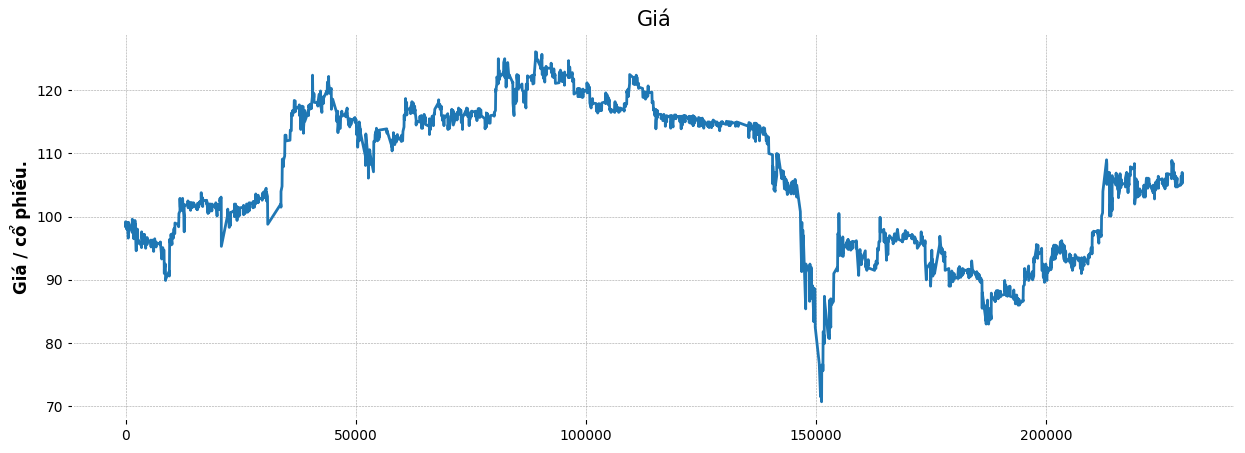

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Giá', fontsize=15)
plt.ylabel('Giá / cổ phiếu.')
plt.show()

Biểu thị giá trị của từng cột

<ipython-input-205-d81fc98410ee>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


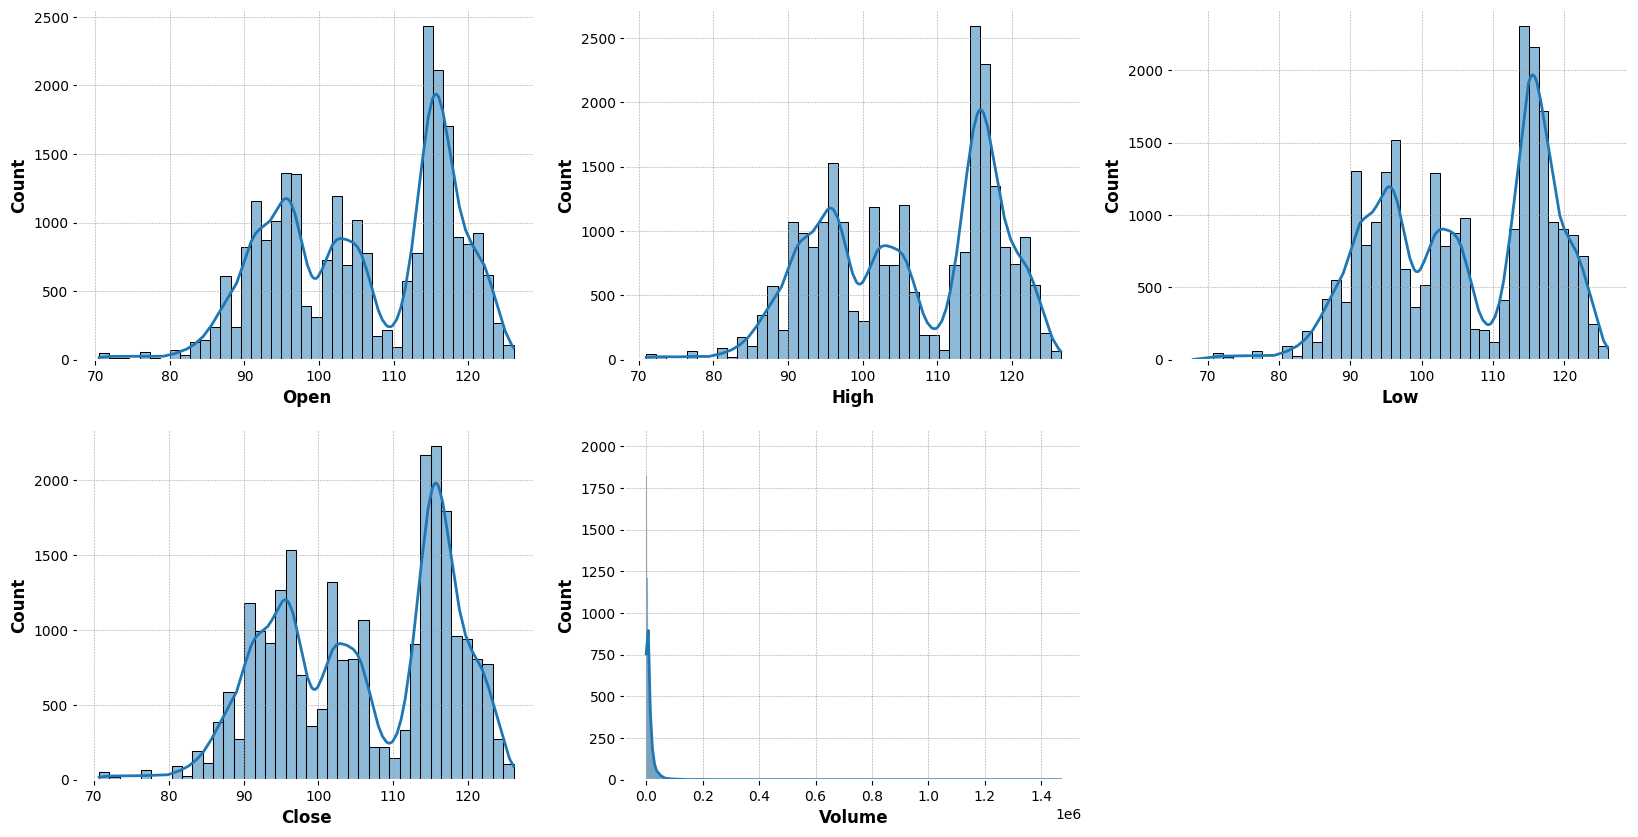

In [205]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(df[col], kde=True)
plt.show()

Thiết lập biểu đồ nến, vì quá bé nên set time về 5 ngày

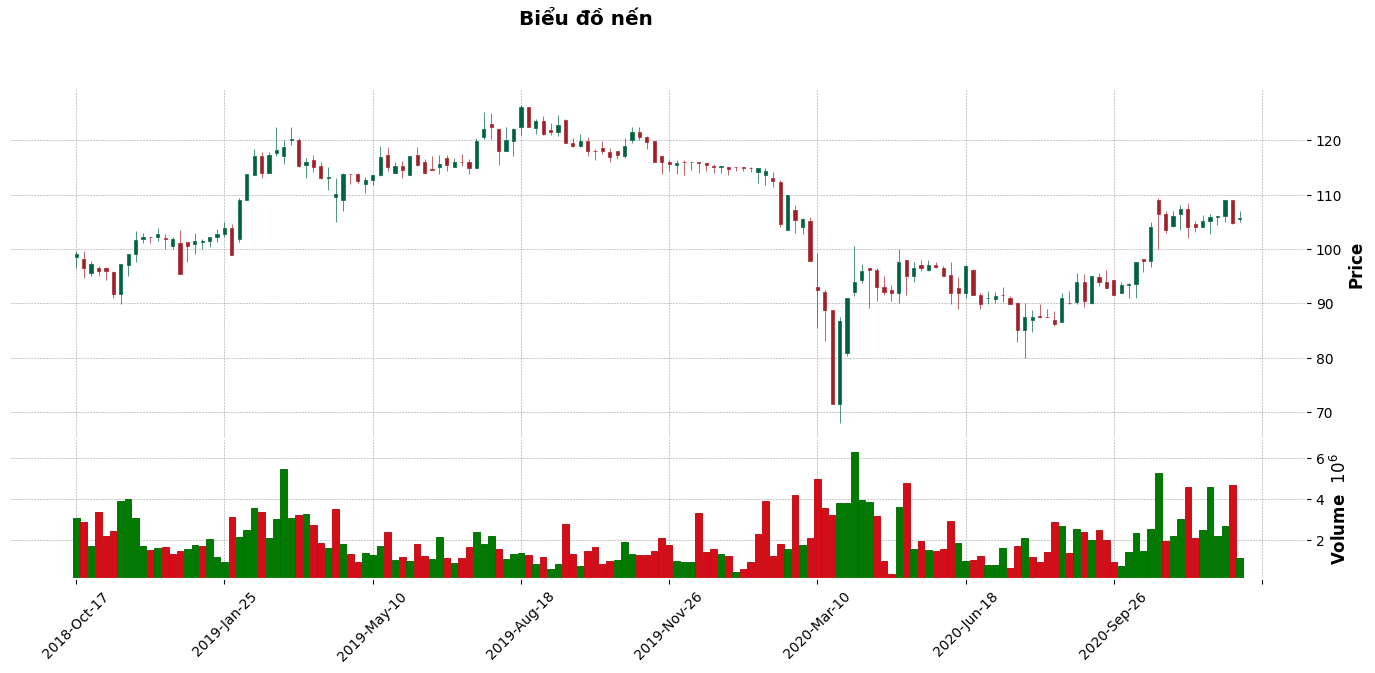

In [206]:
df.set_index('Date/Time', inplace=True)
import mplfinance as mpf

df_resampled = df.resample('5D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()

mpf.plot(df_resampled, type='candle', volume=True, title='Biểu đồ nến', style='charles', figsize=(18, 7))


In [207]:
df.head()

,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-10-17 09:35:00,98.5,98.5,98.5,98.5,390
2018-10-17 09:40:00,98.5,98.7,98.5,98.7,11700
2018-10-17 09:45:00,98.8,98.8,98.7,98.8,14320
2018-10-17 09:50:00,98.8,98.8,98.5,98.6,12340
2018-10-17 09:55:00,98.5,99.0,98.5,99.0,82560


Phân loại lại cột thời gian để tiến hành training dựa theo thời gian, biến động **-> dự đoán biến động**

In [208]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['Biến động'] = df['Close'].diff()
df['Biến động'].fillna(0, inplace=True)
df.to_csv('Scan_' + file_path, index=False)

<ipython-input-208-461192a7a5dd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Biến động'].fillna(0, inplace=True)


Để riêng dữ liệu test để đối chiếu dữ liệu dự đoán với thực tế

In [209]:
test_data = df.loc['2020-12-20':'2020-12-22']


df = df.drop(test_data.index)
df.to_csv('Scan_' + file_path, index=False)

test_data.to_csv(f"{stock_name}_test_data.csv", index=True)

**Phần dự đoán : Biến động**
Các yếu tố : **Như phần bên dưới **

In [210]:
output_var = pd.DataFrame(df['Biến động'])
features = ['minute', 'hour','day', 'month', 'year','Open', 'High', 'Low', 'Volume']

In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,minute,hour,day,month,year,Open,High,Low,Volume
Date/Time,,,,,,,,,
2018-10-17 09:35:00,0.636364,0.0,0.533333,0.818182,0.0,0.503597,0.495495,0.524957,0.000259
2018-10-17 09:40:00,0.727273,0.0,0.533333,0.818182,0.0,0.503597,0.499099,0.524957,0.007961
2018-10-17 09:45:00,0.818182,0.0,0.533333,0.818182,0.0,0.508993,0.500901,0.528399,0.009745
2018-10-17 09:50:00,0.909091,0.0,0.533333,0.818182,0.0,0.508993,0.500901,0.524957,0.008397
2018-10-17 09:55:00,1.000000,0.0,0.533333,0.818182,0.0,0.503597,0.504505,0.524957,0.056218


TimeSeriesSplit chia dữ liệu thành 10 tập huấn luyện và kiểm tra, giữ thứ tự thời gian.

In [212]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

Chuẩn bị dữ liệu cho mô hình LSTM bằng cách chuyển đổi X_train và X_test thành dạng 3D

In [213]:
import numpy as np

trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

Biên dịch mô hình LSTM để dự đoán một giá trị đầu ra

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


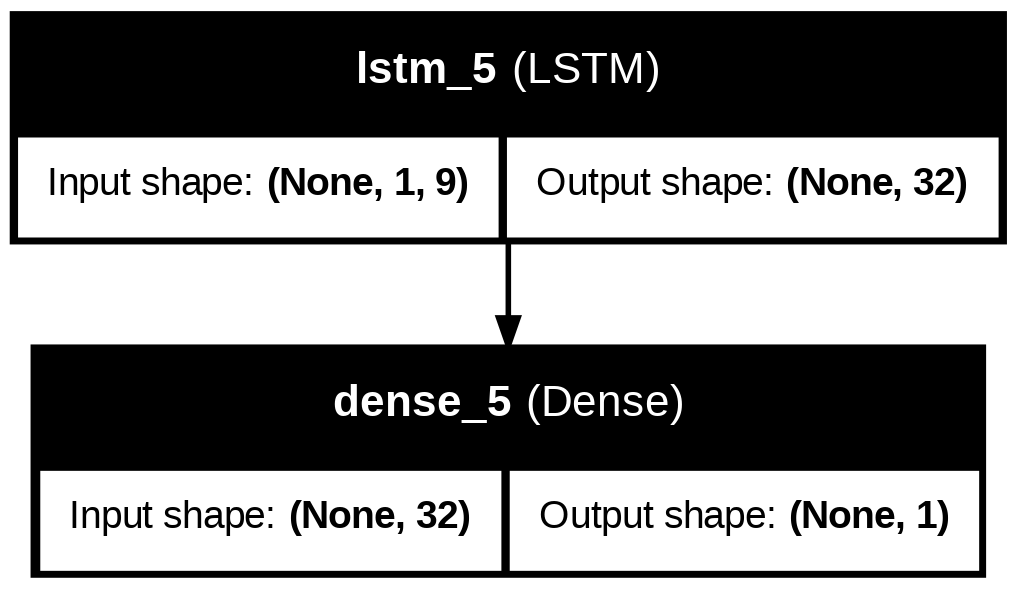

In [214]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

Huấn luyện mô hình lstm

In [215]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0921
Epoch 2/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0920
Epoch 3/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0920
Epoch 4/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0919
Epoch 5/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0919
Epoch 6/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0918
Epoch 7/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0918
Epoch 8/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0918
Epoch 9/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0917
Epoch 10/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0916
Epoch 11/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0916
Epoch 12/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0915
Epoch 13/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0915
Epoch 14/100
2838/2838 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0914
Epoch 15/

Vẽ biểu đồ so sánh thực tế

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


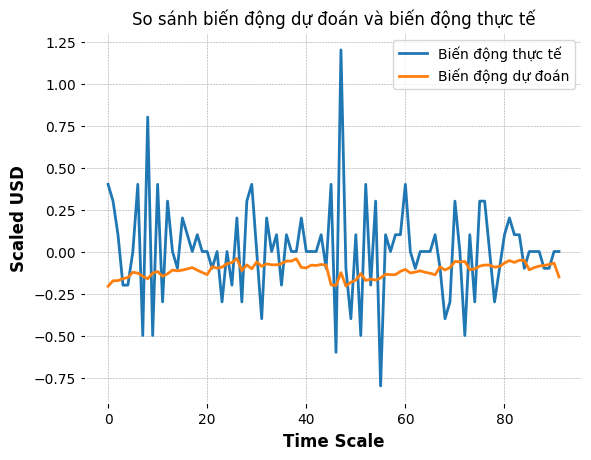

In [219]:
# Assuming 'Biến động' is the output variable for predictions
y_test = test_data['Biến động'].values  # Extracting y_test from test_data

# Scaling the features for the test data
X_test = scaler.transform(test_data[features])  # Apply the same scaler used during training

# Reshape X_test to match the input shape expected by the LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_pred = lstm.predict(X_test)  # Predict with the LSTM model

# Plotting the true values and the predicted values
plt.plot(y_test, label='Biến động thực tế')
plt.plot(y_pred, label='Biến động dự đoán')
plt.title("So sánh biến động dự đoán và biến động thực tế")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


In [220]:
from keras.models import load_model


# Lưu mô hình với tên file theo tên cổ phiếu
model_filename = f"{stock_name}_lstm_model.h5"
lstm.save(model_filename)